<a href="https://colab.research.google.com/github/Mrprey/UFAL/blob/master/Atividade_Semana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/



# Leitura do dataset

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataSets/heart_failure.csv')

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



# Re-escala dos dados

In [4]:
data = (data - data.min())/(data.max()-data.min())

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


# Organizando dados para modelagem

In [5]:
X = data.iloc[:,:-1]
y = data.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [6]:
#modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#treinando
classificador.fit(X_train,y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Algumas plotagens 

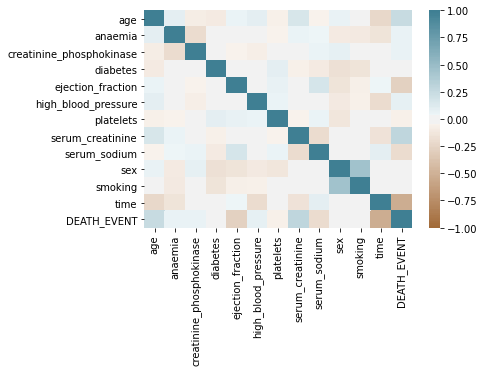

In [22]:
import seaborn as sns

sns.heatmap(data.corr(),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(40, 220, n=200))

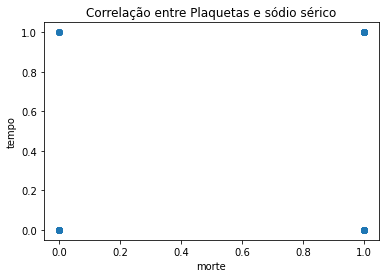

Coeficiente de correlação: 0.06212461923840708


In [24]:
plt.scatter(data.sex,data.smoking)
plt.xlabel('morte')
plt.ylabel('tempo')
plt.title('Correlação entre Plaquetas e sódio sérico')
plt.show()

# calculando o coeficiente de correlação
corr = data['platelets'].corr(data['serum_sodium'])
print("Coeficiente de correlação:", corr)

# Organizando dados para modelagem

In [39]:
#dividindo dados em atributos descritores e atributo de classe
X = data.iloc[:,:-1]
y = data.DEATH_EVENT

Criando modelo

In [42]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtyp

In [54]:
X = X.reset_index(drop=True)

'''DE = EVENT_DEATH'''

grupos = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'DE',grupos)


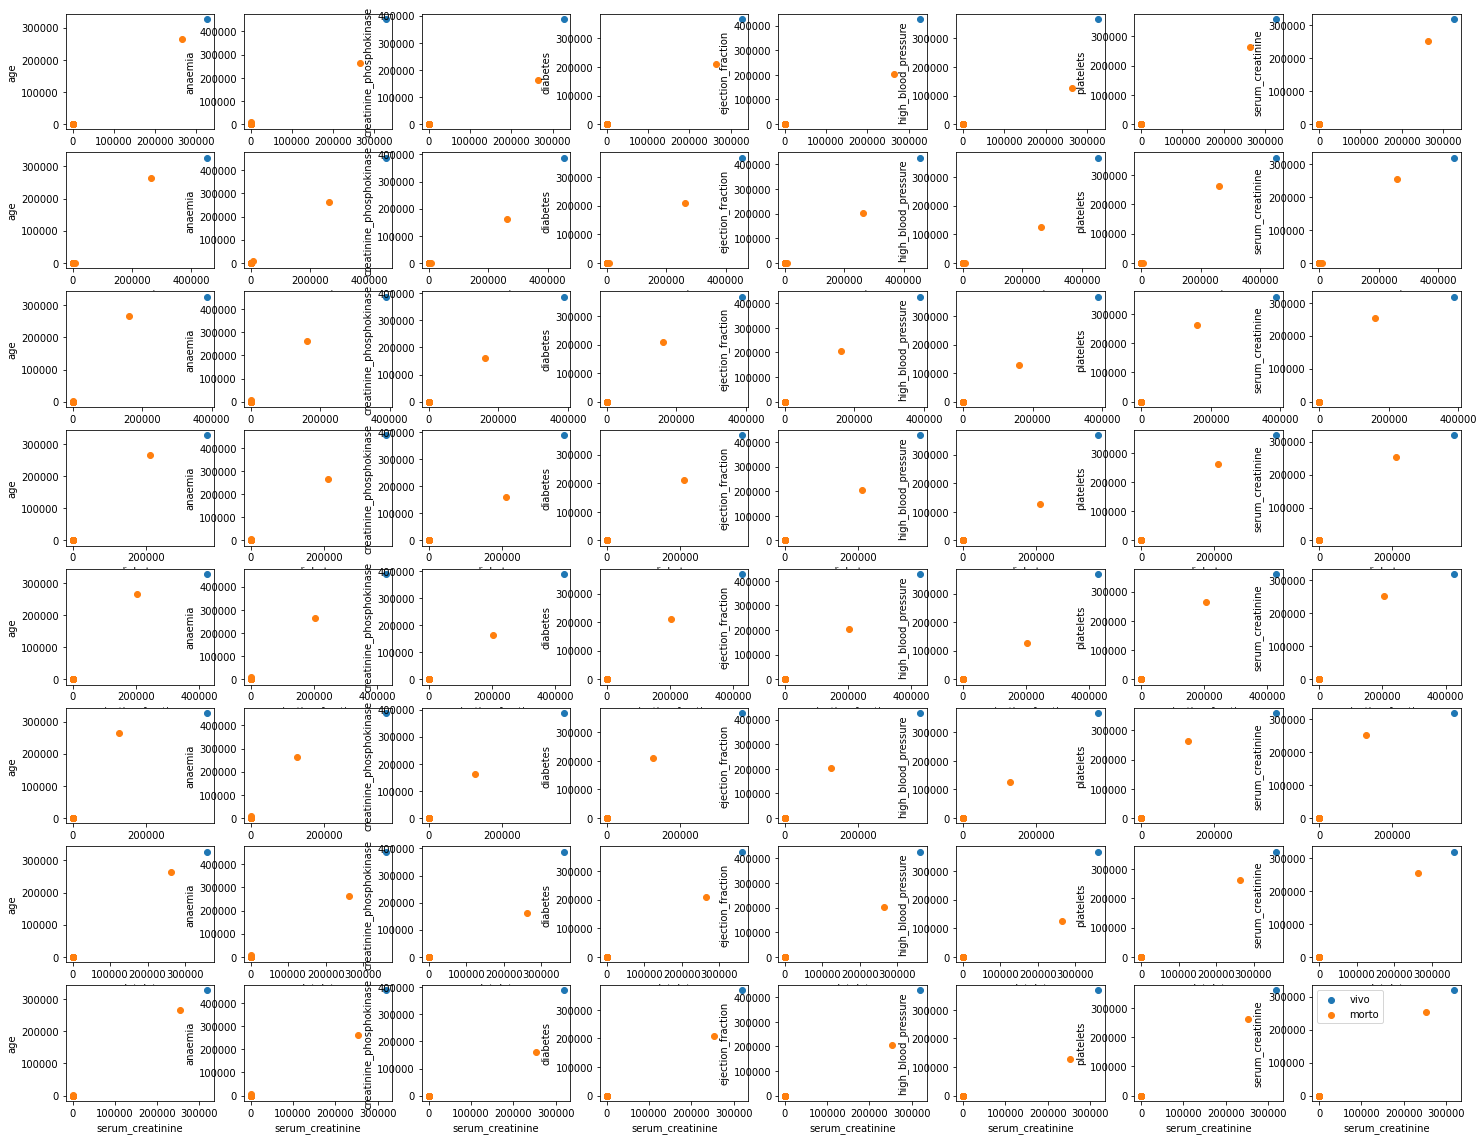

In [64]:
vivo = X[X['DEATH_EVENT']==0]
morto = X[X['DEATH_EVENT']==1]

fig, axs = plt.subplots(8,8)
for i in range(8):
  for j in range(8):
    axs[i,j].scatter(vivo.iloc[i],vivo.iloc[j],label='vivo')
    axs[i,j].scatter(morto.iloc[i],morto.iloc[j],label='morto')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

uma analise rapida, temos que ocorreu formação claras de grupos e alguns dados fora disso, que podem ser outliner ou erros na coleta.

In [60]:
from sklearn.metrics import accuracy_score


acuracia = accuracy_score(y,kmeans_labels)
round(acuracia,3)

0.622

Já á acuracia vai em desencontro com a analise feita anteriormente, mas não é um métrica muito usada para determinar a qualidade de um scatter plot

Scores baseados em informação mútua

In [65]:
from sklearn.metrics import adjusted_mutual_info_score

mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

-0.0004114642138824713

já neste métrica o resulta se mostrou pessimo os agrupamentos formados e talvez uma reanalize dos dados seja necessária no problema.

Coeficiente de Silhueta

In [72]:
from sklearn.metrics import silhouette_score

ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.5828885061812736

In [ ]:
Já o coeficiente de silhueta teve um resultado razoável, mas não sendo bom.

# Definindo modelo de Agrupamento Hierárquico

In [76]:
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

labels_hierarquico

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Avaliando o modelo

In [77]:
#acurácia
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)

0.666

em comparação com o modelo anterior, tivemos um pequena melhora, mas ainda se espera mais.

In [78]:
#índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

-0.003977792888079667

em comparação com o modelo anterior, uma melhora, mas nada de significante

In [79]:
#coeficiente de silhueta
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.6789288513171126

em comparação com o modelo anterior, tambem se teve uma melhora.

# Análise final

os resultados das plotagens eram animadores, mas quando se utilizou métricas foram vistos que os 2 modelos testados não tiveram uma boa performance para resolver o problema, levando ao modelo de floresta com os melhores resultados até o momento.